# Developing Statistical Arbitrage Pairs Trading Strategy

## Objective: 

The purpose of this project is to develop a statistical arbitrage pairs trading strategy using a relative value arbitrage rule. The project follows closely the methodology of [(Gatev, Geotzmann, Rouwenhorst; 2006)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=141615)

**Overview of pairs trading strategy**:

The pairs trading strategy involves identifying pairs of stocks whose price has historically moved together. When the gap between the stocks widens due to some event (e.g., news), you take a long position in the loser and a short position in the winner. When the prices begin to converge again as historical data suggests, this means the losers price will rise and the winners price will drop, making the aforementioned positions profitable. 

However, executing this trading strategy involves answering several questions. As outlined in [(Gatev et al; 2006)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=141615), these questions include “How do you identify stocks that move together? Need they be in the same industry? Should they only be liquid stocks? How far do they have to diverge before a position is put on? When is a position unwound?" In the [(Gatev et al; 2006)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=141615), the authors use an algorithm to select pairs based on the criterion that they have had the same or nearly the same price historically and take positions when the spread between two securities reaches two standard deviations (“although this may not cover transaction costs when prices converge”). 

Cointegration is an important concept on which the pairs trading strategy relies. When two time series (in this case the price of the securites) are cointegrated, they move together in the long-run even after short term deviations (i.e., Long term mean reversion). Fundamental factors that link the two time series together are often the reason behind the reversion to the historical relationship in the long term. For stocks, fundamental factors can include being in the same/related industry or sector.
The pairs trading strategy can mitigate risk by lowering overall exposure to market movements. By taking long and short positions in pairs of stocks, traders no longer have to worry about the direction of the market as they are effectively hedging against general market fluctuations. 

The pairs trading strategy is also considered a form of statistical arbitrage as traders use statistical analysis to identify and exploit perceived market mispricings. Finally, the pairs trading strategy may be more robust and less sensitive to market conditions than other strategies. This is because cointegration relationships can be relatively stable overtime. 



To enhance confidence in the pairs strategy, the project will identify pairs of stocks from the same industry (Automobile manufacturing)

## Step 1: Picking Automobile stocks

Importing daily opening price of top 10 Automobile companies by market capitalization for the formation period 31/3/2022 to 31/3/2023 and loading into pandas dataframe

In [131]:
import pandas as pd

# Specify the file path
file_path = "/Users/mazin/Desktop/data/Formation Automobile daily opening prices.csv"

# Load the CSV file into a Pandas DataFrame
Automobile_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
Automobile_df

,Date,TSLA,TOYOF,TM,BYDDF,BYDDY,MBGYY,MBGAF,BMWYY,BAMXF,VWAGY
0,31/03/2022,364.856659,18.110001,181.820007,28.440001,57.750000,17.770000,72.889999,29.230000,89.550003,25.099001
1,01/04/2022,360.383331,18.020000,180.309998,29.830000,58.290001,17.680000,71.389999,29.309999,89.400002,25.350000
2,04/04/2022,363.126678,17.730000,181.000000,31.049999,61.930000,17.600000,70.699997,29.150000,89.389999,25.049999
3,05/04/2022,378.766663,17.490000,181.500000,31.320000,62.849998,17.260000,69.570000,28.719999,89.349998,24.665001
4,06/04/2022,357.823334,17.780001,176.300003,30.250000,60.400002,16.690001,67.989998,27.540001,80.750000,23.209999
...,...,...,...,...,...,...,...,...,...,...,...
247,27/03/2023,194.419998,13.600000,136.690002,26.799999,53.299999,19.290001,77.309998,35.740002,106.379997,16.370001
248,28/03/2023,192.000000,13.780000,137.410004,27.000000,54.650002,19.400000,78.120003,35.650002,106.379997,16.389999
249,29/03/2023,193.130005,13.830000,139.600006,27.379999,55.840000,18.959999,76.150002,35.599998,107.000000,16.600000
250,30/03/2023,195.580002,14.000000,140.000000,28.500000,57.849998,19.230000,76.959999,36.410000,108.699997,17.219999


Source: [Yahoo finance](https://finance.yahoo.com/screener/unsaved/747a1a54-5cfc-42a9-8dcb-43a6d5fe999a?offset=0&count=100)

## Step 2: Normalising all stock prices (or cumulative total return index)

Using the following equation to normalize price: $$P_{\text{normalized}}  =  \frac{{P - \min(P)}}{{\max(P) - \min(P)}}$$

In [132]:
# List of stock column names
stock_columns = ['TSLA', 'TOYOF', 'TM', 'BYDDF', 'BYDDY', 'MBGYY', 'MBGAF', 'BMWYY', 'BAMXF', 'VWAGY']

# Iterate over each stock column
for column in stock_columns:
    # Calculate the minimum and maximum for the current stock column
    min_price = Automobile_df[column].min()
    max_price = Automobile_df[column].max()

    # Normalize the prices using the formula and create a new column for normalized prices
    Automobile_df[f'{column}_normalized'] = (Automobile_df[column] - min_price) / (max_price - min_price)

# Now, DataFrame "Automobile_df" contains new columns with normalized prices for each stock
Automobile_df

,Date,TSLA,TOYOF,TM,BYDDF,BYDDY,MBGYY,MBGAF,BMWYY,BAMXF,...,TSLA_normalized,TOYOF_normalized,TM_normalized,BYDDF_normalized,BYDDY_normalized,MBGYY_normalized,MBGAF_normalized,BMWYY_normalized,BAMXF_normalized,VWAGY_normalized
0,31/03/2022,364.856659,18.110001,181.820007,28.440001,57.750000,17.770000,72.889999,29.230000,89.550003,...,0.949559,0.982792,1.000000,0.348780,0.362721,0.687824,0.741017,0.476662,0.556713,0.974799
1,01/04/2022,360.383331,18.020000,180.309998,29.830000,58.290001,17.680000,71.389999,29.309999,89.400002,...,0.933337,0.965583,0.969878,0.416585,0.375982,0.676166,0.692457,0.482320,0.553241,1.000000
2,04/04/2022,363.126678,17.730000,181.000000,31.049999,61.930000,17.600000,70.699997,29.150000,89.389999,...,0.943285,0.910134,0.983642,0.476097,0.465373,0.665803,0.670120,0.471004,0.553009,0.969879
3,05/04/2022,378.766663,17.490000,181.500000,31.320000,62.849998,17.260000,69.570000,28.719999,89.349998,...,1.000000,0.864245,0.993616,0.489268,0.487967,0.621762,0.633538,0.440594,0.552083,0.931225
4,06/04/2022,357.823334,17.780001,176.300003,30.250000,60.400002,16.690001,67.989998,27.540001,80.750000,...,0.924054,0.919694,0.889886,0.437073,0.427800,0.547928,0.582389,0.357143,0.353009,0.785140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,27/03/2023,194.419998,13.600000,136.690002,26.799999,53.299999,19.290001,77.309998,35.740002,106.379997,...,0.331512,0.120459,0.099741,0.268780,0.253438,0.884715,0.884105,0.937058,0.946296,0.098394
248,28/03/2023,192.000000,13.780000,137.410004,27.000000,54.650002,19.400000,78.120003,35.650002,106.379997,...,0.322737,0.154876,0.114103,0.278537,0.286591,0.898964,0.910327,0.930693,0.946296,0.100402
249,29/03/2023,193.130005,13.830000,139.600006,27.379999,55.840000,18.959999,76.150002,35.599998,107.000000,...,0.326834,0.164436,0.157790,0.297073,0.315815,0.841969,0.846552,0.927157,0.960648,0.121486
250,30/03/2023,195.580002,14.000000,140.000000,28.500000,57.849998,19.230000,76.959999,36.410000,108.699997,...,0.335719,0.196941,0.165769,0.351707,0.365177,0.876943,0.872774,0.984441,1.000000,0.183735


## Step 3: Finding the combination of automobile stock pairs that minimizes the sum of squared deviations

Using the following equation to find Euclidean Square Distance for each combination of two automibile stocks: 

$$
SDD = \sum_{t=1}^{N} (P_t^1 - P_t^2)^2
$$

In [133]:
# List of stock column names (excluding the "_normalized" suffix)
stock_columns = ['TSLA', 'TOYOF', 'TM', 'BYDDF', 'BYDDY', 'MBGYY', 'MBGAF', 'BMWYY', 'BAMXF', 'VWAGY']

# Generate all possible combinations of two stocks
stock_combinations = list(itertools.combinations(stock_columns, 2))

# Create a dictionary to store the sum of squared differences for each stock combination
sum_squared_diffs = {}

# Iterate over each stock combination
for combo in stock_combinations:
    stock1, stock2 = combo
    squared_diffs = (Automobile_df[f'{stock1}_normalized'] - Automobile_df[f'{stock2}_normalized'])**2
    sum_squared_diff = squared_diffs.sum()
    sum_squared_diffs[f'{stock1}_{stock2}'] = sum_squared_diff

# The "sum_squared_diffs" dictionary contains the sum of squared differences for each stock combination
sum_squared_diffs

{'TSLA_TOYOF': 10.958333362579058,
 'TSLA_TM': 12.148244155694229,
 'TSLA_BYDDF': 17.96328480904195,
 'TSLA_BYDDY': 17.87308997578851,
 'TSLA_MBGYY': 40.511512200667,
 'TSLA_MBGAF': 40.6992588936736,
 'TSLA_BMWYY': 44.49067845202424,
 'TSLA_BAMXF': 43.03551528374606,
 'TSLA_VWAGY': 10.16482741177223,
 'TOYOF_TM': 0.78170901486884,
 'TOYOF_BYDDF': 12.921911415751314,
 'TOYOF_BYDDY': 12.570493578691961,
 'TOYOF_MBGYY': 35.365598009605534,
 'TOYOF_MBGAF': 35.42661220389471,
 'TOYOF_BMWYY': 40.06003624271417,
 'TOYOF_BAMXF': 40.082501392981314,
 'TOYOF_VWAGY': 4.234762192681836,
 'TM_BYDDF': 13.516174361350949,
 'TM_BYDDY': 13.13090086967792,
 'TM_MBGYY': 36.9047163451619,
 'TM_MBGAF': 36.92705801054382,
 'TM_BMWYY': 40.777317048629314,
 'TM_BAMXF': 41.072464659054056,
 'TM_VWAGY': 3.6635738425814477,
 'BYDDF_BYDDY': 0.1312980561856135,
 'BYDDF_MBGYY': 37.167103191147845,
 'BYDDF_MBGAF': 37.362624200201466,
 'BYDDF_BMWYY': 37.6810654917649,
 'BYDDF_BAMXF': 36.70986633709475,
 'BYDDF_VWAGY'

Finding the pair of stocks with the lowest sum of squared deviations between their two normalized price series

In [134]:
# Find the lowest value and its corresponding key in the sum_squared_diffs dictionary
min_key = min(sum_squared_diffs, key=sum_squared_diffs.get)
min_value = sum_squared_diffs[min_key]

print(f"The lowest value is {min_value} for the combination of {min_key}.")

The lowest value is 0.05389656605025048 for the combination of MBGYY_MBGAF.


The combination of Mercedes Benz Group ADR (MBGYY) and Mercedes Benz Group AG (MBGAF) stocks have the lowest SSD value. Lets visualise the relationship graphically:

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_37863/706285738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_normalized'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_37863/706285738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_normalized'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykern

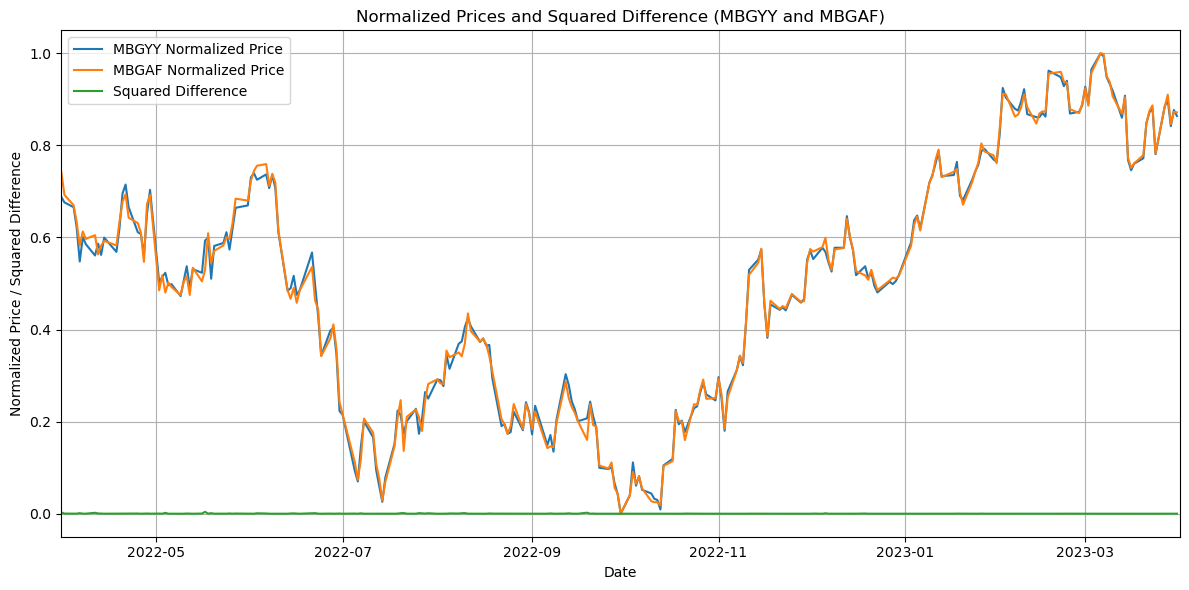

In [135]:
import matplotlib.pyplot as plt

# Extract the relevant columns
df = Automobile_df[['Date', 'MBGYY', 'MBGAF']]

# Normalize the prices using the formula P_normalized = (P - min(P)) / (max(P) - min(P))
for column in ['MBGYY', 'MBGAF']:
    df[column + '_normalized'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Calculate the squared difference between normalized prices
df['Squared_Difference'] = (df['MBGYY_normalized'] - df['MBGAF_normalized']) ** 2

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a line graph with a white background and X-axis ticks for the month
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['MBGYY_normalized'], label='MBGYY Normalized Price')
plt.plot(df['Date'], df['MBGAF_normalized'], label='MBGAF Normalized Price')
plt.plot(df['Date'], df['Squared_Difference'], label='Squared Difference')
plt.xlabel('Date')
plt.ylabel('Normalized Price / Squared Difference')
plt.title('Normalized Prices and Squared Difference (MBGYY and MBGAF)')
plt.legend()
plt.grid(True)

# Set the X-axis limits for your specific time period
plt.xlim(pd.to_datetime('2022-03-31'), pd.to_datetime('2023-04-01'))

plt.tight_layout()
plt.show()


## Step 4: Calculating historical spread volatility of selected pair of automobile stocks (i.e., standard deviation of the difference between normalised prices of MBGYY and MBGAF)

In [136]:
# Create a new DataFrame with columns from Automobile_df
MBGYY_MBGAF_df = Automobile_df[['Date', 'MBGYY_normalized', 'MBGAF_normalized']].copy()

# Calculate spread and add new column called 'Spread'
MBGYY_MBGAF_df['Spread'] = MBGYY_MBGAF_df['MBGYY_normalized'] - MBGYY_MBGAF_df['MBGAF_normalized']

# Calculate the mean of the 'Spread' column
spread_mean = MBGYY_MBGAF_df['Spread'].mean()

# Calculate standard deviation of spread
spread_std = MBGYY_MBGAF_df['Spread'].std()

# Print the mean and standard deviation
print(f"Mean of Spread: {spread_mean}")
print(f"Standard Deviation of Spread: {spread_std}")

Mean of Spread: 5.306249406498733e-05
Standard Deviation of Spread: 0.014653481768370124


## Step 5: Creating trading rules for selected pair of automobile stocks MBGYY and MBGAF and backtesting on 6 months trading period 

Importing daily opening price of top 10 Automobile companies by market capitalization for the trading period 03/04/2023 to 29/09/2023 and loading into pandas dataframe. However, we will only be using data for MBGYY and MBGAF

In [137]:
# Specify the file path
file_path = "/Users/mazin/Desktop/data/Test Automobile daily opening prices.csv"

# Load the CSV file into a Pandas DataFrame
Automobile_Trading_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
Automobile_Trading_df

,Date,TSLA,TOYOF,TM,BYDDF,BYDDY,MBGYY,MBGAF,BMWYY,BAMXF,VWAGY
0,03/04/2023,199.910004,14.120000,142.000000,29.350000,59.450001,19.100000,76.459999,36.680000,108.699997,17.100000
1,04/04/2023,197.320007,14.190000,143.039993,29.469999,58.200001,19.250000,77.690002,37.250000,111.250000,17.270000
2,05/04/2023,190.520004,14.100000,140.550003,29.290001,58.380001,18.709999,75.169998,36.250000,108.099998,16.959999
3,06/04/2023,183.080002,13.870000,139.190002,28.660000,57.570000,18.330000,73.599998,35.490002,108.099998,16.660000
4,10/04/2023,179.940002,13.830000,138.529999,29.250000,58.000000,18.000000,74.500000,36.599998,108.099998,16.700001
...,...,...,...,...,...,...,...,...,...,...,...
120,25/09/2023,243.380005,17.920000,185.000000,31.750000,63.299999,17.490000,70.279999,34.360001,105.000000,13.730000
121,26/09/2023,242.979996,18.110001,181.210007,29.600000,60.450001,17.240000,69.209999,34.000000,105.000000,13.490000
122,27/09/2023,244.259995,19.240000,183.259995,30.750000,61.000000,17.170000,69.000000,33.980000,105.000000,13.110000
123,28/09/2023,240.020004,18.420000,180.529999,30.400000,60.000000,17.090000,68.709999,33.770000,101.500000,12.880000


Normalising stock prices once again

In [138]:
# List of stock column names
stock_columns = ['TSLA', 'TOYOF', 'TM', 'BYDDF', 'BYDDY', 'MBGYY', 'MBGAF', 'BMWYY', 'BAMXF', 'VWAGY']

# Iterate over each stock column
for column in stock_columns:
    # Calculate the minimum and maximum for the current stock column
    min_price = Automobile_Trading_df[column].min()
    max_price = Automobile_Trading_df[column].max()

    # Normalize the prices using the formula and create a new column for normalized prices
    Automobile_Trading_df[f'{column}_normalized'] = (Automobile_Trading_df[column] - min_price) / (max_price - min_price)

# Now, DataFrame "Automobile_df" contains new columns with normalized prices for each stock
Automobile_Trading_df

,Date,TSLA,TOYOF,TM,BYDDF,BYDDY,MBGYY,MBGAF,BMWYY,BAMXF,...,TSLA_normalized,TOYOF_normalized,TM_normalized,BYDDF_normalized,BYDDY_normalized,MBGYY_normalized,MBGAF_normalized,BMWYY_normalized,BAMXF_normalized,VWAGY_normalized
0,03/04/2023,199.910004,14.120000,142.000000,29.350000,59.450001,19.100000,76.459999,36.680000,108.699997,...,0.329637,0.178170,0.132319,0.241228,0.244294,0.574286,0.558357,0.402490,0.307446,0.914347
1,04/04/2023,197.320007,14.190000,143.039993,29.469999,58.200001,19.250000,77.690002,37.250000,111.250000,...,0.311576,0.189406,0.149520,0.254386,0.167181,0.617143,0.646974,0.481328,0.409528,0.950749
2,05/04/2023,190.520004,14.100000,140.550003,29.290001,58.380001,18.709999,75.169998,36.250000,108.099998,...,0.264156,0.174960,0.108336,0.234649,0.178285,0.462857,0.465418,0.343015,0.283427,0.884368
3,06/04/2023,183.080002,13.870000,139.190002,28.660000,57.570000,18.330000,73.599998,35.490002,108.099998,...,0.212273,0.138042,0.085842,0.165570,0.128316,0.354286,0.352305,0.237898,0.283427,0.820128
4,10/04/2023,179.940002,13.830000,138.529999,29.250000,58.000000,18.000000,74.500000,36.599998,108.099998,...,0.190377,0.131621,0.074926,0.230263,0.154843,0.260000,0.417147,0.391424,0.283427,0.828694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,25/09/2023,243.380005,17.920000,185.000000,31.750000,63.299999,17.490000,70.279999,34.360001,105.000000,...,0.632775,0.788122,0.843533,0.504386,0.481801,0.114286,0.113112,0.081605,0.159328,0.192719
121,26/09/2023,242.979996,18.110001,181.210007,29.600000,60.450001,17.240000,69.209999,34.000000,105.000000,...,0.629986,0.818620,0.780847,0.268640,0.305984,0.042857,0.036023,0.031812,0.159328,0.141328
122,27/09/2023,244.259995,19.240000,183.259995,30.750000,61.000000,17.170000,69.000000,33.980000,105.000000,...,0.638912,1.000000,0.814753,0.394737,0.339914,0.022857,0.020893,0.029046,0.159328,0.059957
123,28/09/2023,240.020004,18.420000,180.529999,30.400000,60.000000,17.090000,68.709999,33.770000,101.500000,...,0.609344,0.868379,0.769600,0.356360,0.278223,0.000000,0.000000,0.000000,0.019215,0.010707


In [139]:
# Create a new DataFrame with columns from Automobile_df
Test_MBGYY_MBGAF_df = Automobile_Trading_df[['Date', 'MBGYY', 'MBGAF', 'MBGYY_normalized', 'MBGAF_normalized']].copy()

# Calculate spread and add new column called 'Spread'
Test_MBGYY_MBGAF_df['Spread'] = Test_MBGYY_MBGAF_df['MBGYY_normalized'] - Test_MBGYY_MBGAF_df['MBGAF_normalized']

Test_MBGYY_MBGAF_df

,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread
0,03/04/2023,19.100000,76.459999,0.574286,0.558357,0.015928
1,04/04/2023,19.250000,77.690002,0.617143,0.646974,-0.029832
2,05/04/2023,18.709999,75.169998,0.462857,0.465418,-0.002561
3,06/04/2023,18.330000,73.599998,0.354286,0.352305,0.001980
4,10/04/2023,18.000000,74.500000,0.260000,0.417147,-0.157147
...,...,...,...,...,...,...
120,25/09/2023,17.490000,70.279999,0.114286,0.113112,0.001173
121,26/09/2023,17.240000,69.209999,0.042857,0.036023,0.006834
122,27/09/2023,17.170000,69.000000,0.022857,0.020893,0.001964
123,28/09/2023,17.090000,68.709999,0.000000,0.000000,0.000000


**The trading rules are as follows**: 

1. Enter a position when the spread is greater or lower than the historical mean by two standard deviations

2. Sell signal is for two standard deviations above historical mean and buy signal is for two standard deviations below the mean. 

3. Close position when spread is within a sixth of a standard deviation above or below the historical mean (note: spread is never equal to exactly the mean so we have to define an interval that is very close to the mean) 


**Sell signal**: 

A sell signal in statistical arbitrage pairs trading strategy occurs when you believe that the spread between the two correlated assets is likely to narrow, but it has recently widened. This signal suggests that you should short sell the underperforming asset (the one whose price has risen relative to the other) while simultaneously buying the outperforming asset (the one whose price has fallen relative to the other). In this case this would mean short selling MBGYY and buying MBGAF. The objective is to profit from the expectation that the spread will revert to its historical mean, which is the close position. You profit if the underperforming asset increases in value relative to the outperforming asset. 

**Buy signal**:

A buy signal in a pairs trading strategy occurs when you believe that the spread between the two correlated assets is likely to widen, but it has recently narrowed, presenting a potential opportunity. This signal suggests that you should buy the underperforming asset (the one whose price has fallen relative to the other) while simultaneously selling short the outperforming asset (the one whose price has risen relative to the other). In this case this would mean short selling MBGAF and buying MBGYY. The objective is to profit from the expectation that the spread will revert to its historical mean or a predefined target level. You profit if the underperforming asset increases in value relative to the outperforming asset.

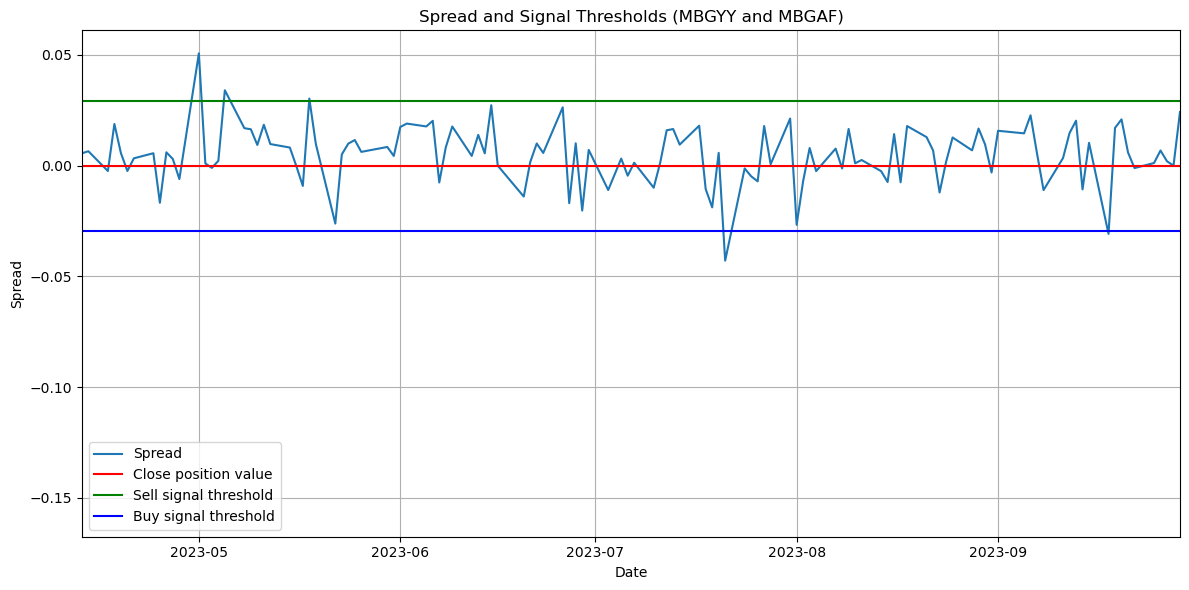

In [141]:


# Create a figure and axis with white background
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot the 'Spread' line
ax.plot(Test_MBGYY_MBGAF_df['Date'], Test_MBGYY_MBGAF_df['Spread'], label='Spread')

# Plot horizontal lines with solid linestyle
ax.axhline(y=spread_mean, color='r', linestyle='-', label='Close position value')
ax.axhline(y=2 * spread_std, color='g', linestyle='-', label='Sell signal threshold')
ax.axhline(y=-2 * spread_std, color='b', linestyle='-', label='Buy signal threshold')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
ax.set_title('Spread and Signal Thresholds (MBGYY and MBGAF)')
ax.legend()

# Manually parse the date strings into the 'yyyy-mm-dd' format
Test_MBGYY_MBGAF_df['Date'] = pd.to_datetime(Test_MBGYY_MBGAF_df['Date'], format='%d/%m/%Y')

# Set the X-axis limits for your specific time period
ax.set_xlim(pd.to_datetime('2023-04-13'), pd.to_datetime('2023-09-29'))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()







Creating a dataframe called Test_df that that records the the values in each column in Test_MBGYY_MBGAF_df whenever the following occurs: 

* The value of the Spread is greater than two standard deviations above the mean 
* The value of the Spread is between a sixth of a standard deviation above or below spread_mean
* The value of the Spread is less than two standard deviations below the mean 

We will also create a new column called "Case" in the Test_df and input the following: 

* Value of 1 is the value of the Spread is greater than double spread_std 
* Value of 2 if the value of the Spread is between a sixth of a standard deviation above or below the mean 
* Value of 3 if the value of the Spread is less than double spread_std multiplied by negative 1

In [173]:
# Initialize a list to store the rows that meet the conditions
selected_rows = []

# Define the thresholds
double_std_threshold = 2 * spread_std
spread_mean_threshold = spread_mean
negative_double_std_threshold = -2 * spread_std
sixth_std_threshold = spread_std / 6

# Filter rows based on the conditions and add the "Case" column
Test_MBGYY_MBGAF_df['Case'] = None  # Initialize the "Case" column

# Condition 1: Spread is greater than double spread_std
condition1 = (Test_MBGYY_MBGAF_df['Spread'] > double_std_threshold)
Test_MBGYY_MBGAF_df.loc[condition1, 'Case'] = '1 (Sell)'

# Condition 2: Spread is between 1/5*spread_std and -1/5*spread_std
condition2 = ((Test_MBGYY_MBGAF_df['Spread'] > -sixth_std_threshold) & 
              (Test_MBGYY_MBGAF_df['Spread'] < sixth_std_threshold))
Test_MBGYY_MBGAF_df.loc[condition2, 'Case'] = '2 (Close)'

# Condition 3: Spread is less than double spread_std multiplied by negative 1
condition3 = (Test_MBGYY_MBGAF_df['Spread'] < negative_double_std_threshold)
Test_MBGYY_MBGAF_df.loc[condition3, 'Case'] = '3 (Buy)'

# Create 'Test_df' by dropping rows where "Case" is None
Test_df = Test_MBGYY_MBGAF_df.dropna(subset=['Case']).reset_index(drop=True)

# Display 'Test_df'
Test_df

,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread,Case
0,2023-04-04,19.250000,77.690002,0.617143,0.646974,-0.029832,3 (Buy)
1,2023-04-06,18.330000,73.599998,0.354286,0.352305,0.001980,2 (Close)
2,2023-04-10,18.000000,74.500000,0.260000,0.417147,-0.157147,3 (Buy)
3,2023-04-17,18.950001,76.120003,0.531429,0.533862,-0.002433,2 (Close)
4,2023-04-20,18.650000,74.930000,0.445714,0.448127,-0.002413,2 (Close)
5,2023-05-01,19.610001,78.000000,0.720000,0.669309,0.050692,1 (Sell)
6,2023-05-02,19.320000,77.540001,0.637143,0.636167,0.000975,2 (Close)
7,2023-05-03,19.250000,77.290001,0.617143,0.618156,-0.001013,2 (Close)
8,2023-05-04,17.959999,72.129997,0.248571,0.246398,0.002174,2 (Close)
9,2023-05-05,18.190001,72.599998,0.314286,0.280259,0.034027,1 (Sell)


From the above table we can manually see the dates in which to enter a position and close

* 1st trade: Buy signal. Enter position on 2023-04-04 (index: 0) and close position on  2023-04-06 (index: 1)


* 2nd trade: Buy signal. Enter position on 2023-04-10 (index: 2) and close position on  2023-04-20 (index: 4)


* 3rd trade: Sell signal. Enter position on 2023-05-01 (index: 5) and close position on  2023-05-02 (index: 6)


* 4th trade: Sell signal. Enter position on 2023-05-05 (index: 9) and close position on  2023-05-16 (index: 10)


* 5th trade: Sell signal. Enter position on 2023-05-18 (index: 11) and close position on  2023-06-16 (index: 12)


* 6th trade: Buy signal. Enter position on 2023-07-21 (index: 16) and close position on  2023-07-28 (index: 18)


* 7th trade: Buy signal. Enter position on 2023-09-18 (index: 22) and close position on  2023-09-28 (index: 26)







**For Sell Signal (Short Selling MBGYY and Buying MBGAF)**:

$$
\text{Return} = \left(\frac{\text{Entry Price (MBGYY)} - \text{Exit Price (MBGYY)}}{\text{Entry Price (MBGYY)}}\right) + \left(\frac{\text{Exit Price (MBGAF)} - \text{Entry Price (MBGAF)}}{\text{Entry Price (MBGAF)}}\right)
$$

**For Buy Signal (Short Selling MBGAF and Buying MBGYY)**:

$$
\text{Return} = \left(\frac{\text{Entry Price (MBGAF)} - \text{Exit Price (MBGAF)}}{\text{Entry Price (MBGAF)}}\right) + \left(\frac{\text{Exit Price (MBGYY)} - \text{Entry Price (MBGYY)}}{\text{Entry Price (MBGYY)}}\right)
$$

Finding total returns for trading positions with buy signal

In [175]:
import pandas as pd

# Create a list of index values to copy
indices_to_copy = [0, 1, 2, 4, 16, 18, 22, 26]

# Initialize an empty DataFrame 'Buy_df' with the same columns as 'Test_df'
Buy_df = pd.DataFrame(columns=Test_df.columns)

# Copy rows with specified indices to 'Buy_df'
for idx in indices_to_copy:
    Buy_df = pd.concat([Buy_df, Test_df.loc[idx:idx]])

# Reset the index of 'Buy_df' if needed
Buy_df.reset_index(drop=True, inplace=True)

# Display 'Buy_df'
Buy_df


/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_37863/2531780036.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Buy_df = pd.concat([Buy_df, Test_df.loc[idx:idx]])


,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread,Case
0,2023-04-04,19.250000,77.690002,0.617143,0.646974,-0.029832,3 (Buy)
1,2023-04-06,18.330000,73.599998,0.354286,0.352305,0.001980,2 (Close)
2,2023-04-10,18.000000,74.500000,0.260000,0.417147,-0.157147,3 (Buy)
3,2023-04-20,18.650000,74.930000,0.445714,0.448127,-0.002413,2 (Close)
4,2023-07-21,19.870001,80.330002,0.794286,0.837176,-0.042890,3 (Buy)
5,2023-07-28,20.040001,80.400002,0.842857,0.842219,0.000638,2 (Close)
6,2023-09-18,17.610001,71.199997,0.148572,0.179395,-0.030823,3 (Buy)
7,2023-09-28,17.090000,68.709999,0.000000,0.000000,0.000000,2 (Close)


In [179]:
# Calculate the difference for MBGYY and MBGAF columns and store in new columns
Buy_df['MBGYY_cashflow'] = Buy_df['MBGYY'].diff()
Buy_df['MBGAF_cashflow'] = Buy_df['MBGAF'].diff().mul(-1)  # Negative one is multiplied to reverse the sign since we are short selling MBGAF
# Display the updated 'Buy_df' DataFrame
Buy_df


,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread,Case,MBGYY_cashflow,MBGAF_cashflow
0,2023-04-04,19.250000,77.690002,0.617143,0.646974,-0.029832,3 (Buy),NaN,NaN
1,2023-04-06,18.330000,73.599998,0.354286,0.352305,0.001980,2 (Close),-0.920000,4.090004
2,2023-04-10,18.000000,74.500000,0.260000,0.417147,-0.157147,3 (Buy),-0.330000,-0.900002
3,2023-04-20,18.650000,74.930000,0.445714,0.448127,-0.002413,2 (Close),0.650000,-0.430000
4,2023-07-21,19.870001,80.330002,0.794286,0.837176,-0.042890,3 (Buy),1.220001,-5.400002
5,2023-07-28,20.040001,80.400002,0.842857,0.842219,0.000638,2 (Close),0.170000,-0.070000
6,2023-09-18,17.610001,71.199997,0.148572,0.179395,-0.030823,3 (Buy),-2.430000,9.200005
7,2023-09-28,17.090000,68.709999,0.000000,0.000000,0.000000,2 (Close),-0.520001,2.489998


In [180]:
# 1. Sum values of MBGYY_cashflow in the rows indexed 1, 2, 3, 4, 5, 6, and 7
total_return_MBGYY = Buy_df.loc[1:7, 'MBGYY_cashflow'].sum()
print(f"Total absolute return from buying MBGYY: {total_return_MBGYY}")

# 2. Sum values of MBGAF_cashflow in the rows indexed 1, 2, 3, 4, 5, 6, and 7
total_return_MBGAF = Buy_df.loc[1:7, 'MBGAF_cashflow'].sum()
print(f"Total absolute return from short selling MBGAF: {total_return_MBGAF}")

# 3. Sum values of MBGYY in the rows indexed 0, 1, 2, 3, 4, 5, and 6
total_investment_MBGYY = Buy_df.loc[0:6, 'MBGYY'].sum()
print(f"Total invested in buying MBGYY: {total_investment_MBGYY}")

# 4. Sum values of MBGAF in the rows indexed 0, 1, 2, 3, 4, 5, and 6
total_investment_MBGAF = Buy_df.loc[0:6, 'MBGAF'].sum()
print(f"Total invested in short-selling MBGAF: {total_investment_MBGAF}")

Total absolute return from buying MBGYY: -2.16
Total absolute return from short selling MBGAF: 8.98000300000001
Total invested in buying MBGYY: 131.750003
Total invested in short-selling MBGAF: 532.650001


Finding total returns for trading positions with sell signal

In [181]:
# Create a list of index values to copy
indices_to_copy = [5, 6, 9, 10, 11, 12]

# Initialize an empty DataFrame 'Sell_df' with the same columns as 'Test_df'
Sell_df = pd.DataFrame(columns=Test_df.columns)

# Copy rows with specified indices to 'Sell_df'
for idx in indices_to_copy:
    Sell_df = pd.concat([Sell_df, Test_df.loc[idx:idx]])

# Reset the index of 'Sell_df' if needed
Sell_df.reset_index(drop=True, inplace=True)

# Display 'Sell_df'
Sell_df

/var/folders/zp/q9wvv5jj4xg3xvcg2fjbmm_w0000gn/T/ipykernel_37863/2568421056.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Sell_df = pd.concat([Sell_df, Test_df.loc[idx:idx]])


,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread,Case
0,2023-05-01,19.610001,78.000000,0.720000,0.669309,0.050692,1 (Sell)
1,2023-05-02,19.320000,77.540001,0.637143,0.636167,0.000975,2 (Close)
2,2023-05-05,18.190001,72.599998,0.314286,0.280259,0.034027,1 (Sell)
3,2023-05-16,18.330000,73.629997,0.354286,0.354467,-0.000181,2 (Close)
4,2023-05-18,18.830000,75.190002,0.497143,0.466859,0.030284,1 (Sell)
5,2023-06-16,20.590000,82.589996,1.000000,1.000000,0.000000,2 (Close)


In [182]:
# Calculate the difference for MBGYY and MBGAF columns and store in new columns
Sell_df['MBGYY_cashflow'] = Sell_df['MBGYY'].diff().mul(-1)  # Negative one is multiplied to reverse the sign since we are short selling MBGYY
Sell_df['MBGAF_cashflow'] = Sell_df['MBGAF'].diff()
# Display the updated 'Sell_df' DataFrame
Sell_df

,Date,MBGYY,MBGAF,MBGYY_normalized,MBGAF_normalized,Spread,Case,MBGYY_cashflow,MBGAF_cashflow
0,2023-05-01,19.610001,78.000000,0.720000,0.669309,0.050692,1 (Sell),NaN,NaN
1,2023-05-02,19.320000,77.540001,0.637143,0.636167,0.000975,2 (Close),0.290001,-0.459999
2,2023-05-05,18.190001,72.599998,0.314286,0.280259,0.034027,1 (Sell),1.129999,-4.940003
3,2023-05-16,18.330000,73.629997,0.354286,0.354467,-0.000181,2 (Close),-0.139999,1.029999
4,2023-05-18,18.830000,75.190002,0.497143,0.466859,0.030284,1 (Sell),-0.500000,1.560005
5,2023-06-16,20.590000,82.589996,1.000000,1.000000,0.000000,2 (Close),-1.760000,7.399994


In [183]:
# 1. Sum values of MBGYY_cashflow in the rows indexed 1, 2, 3, 4, and 5
totals_return_MBGYY = Sell_df.loc[1:5, 'MBGYY_cashflow'].sum()
print(f"Total absolute return from short-selling MBGYY: {total_return_MBGYY}")

# 2. Sum values of MBGAF_cashflow in the rows indexed 1, 2, 3, 4, and 5
totals_return_MBGAF = Sell_df.loc[1:5, 'MBGAF_cashflow'].sum()
print(f"Total absolute return from buying MBGAF: {total_return_MBGAF}")

# 3. Sum values of MBGYY in the rows indexed 0, 1, 2, 3, and 4
totals_investment_MBGYY = Sell_df.loc[0:4, 'MBGYY'].sum()
print(f"Total invested in short-selling MBGYY: {total_investment_MBGYY}")

# 4. Sum values of MBGAF in the rows indexed 0, 1, 2, 3, and 4
totals_investment_MBGAF = Sell_df.loc[0:4, 'MBGAF'].sum()
print(f"Total invested in buying MBGAF: {total_investment_MBGAF}")

Total absolute return from short-selling MBGYY: -2.16
Total absolute return from buying MBGAF: 8.98000300000001
Total invested in short-selling MBGYY: 131.750003
Total invested in buying MBGAF: 532.650001


Thus, we can calculate the return across sell signal and buy signal trading positions

In [186]:
Total_return = ((total_return_MBGYY+totals_return_MBGYY+total_return_MBGAF+totals_return_MBGAF)/(total_investment_MBGYY+totals_investment_MBGYY+total_investment_MBGAF+totals_investment_MBGAF))

# Calculate the total return as a percentage
total_return_percentage = (Total_return * 100).round(2)  # Round to 2 decimal places

# Print the total return with a percentage sign
print(f"Total return from pairs trading strategy: {total_return_percentage}%")

Total return from pairs trading strategy: 0.92%
